<a href="https://colab.research.google.com/github/JaoSaraiva/-Engenhando-com-Dados/blob/main/modelo_preditivo_ML_locacao_bike_engjao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

In [79]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [80]:
df.shape

(17429, 10)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [82]:
df.isnull().sum()

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

In [83]:
#usando o método interpolate do pandas para preenchimento de dados null: ele tira a média dos valores próximos e faz o preenchimento com esta média.
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


In [84]:
df.duplicated().sum()

15

In [85]:
duplicatas = df.duplicated(keep=False)
linhas_duplicadas = df[duplicatas]
linhas_duplicadas.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [86]:
df_limpo = df.drop_duplicates()
df_limpo.shape

(17414, 10)

In [87]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

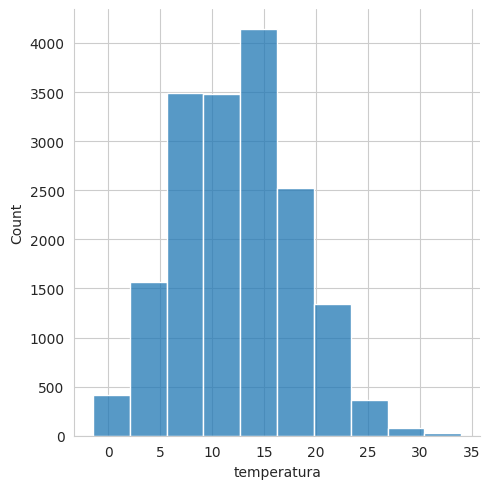

In [89]:
sns.displot(df_limpo, x='temperatura', bins=10)
plt.show()

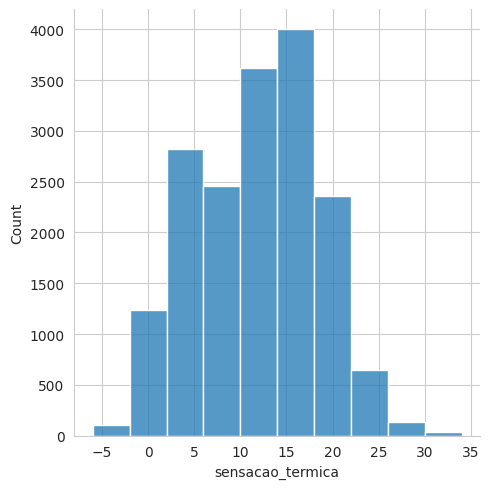

In [90]:
sns.displot(df_limpo, x='sensacao_termica', bins=10)
plt.show()

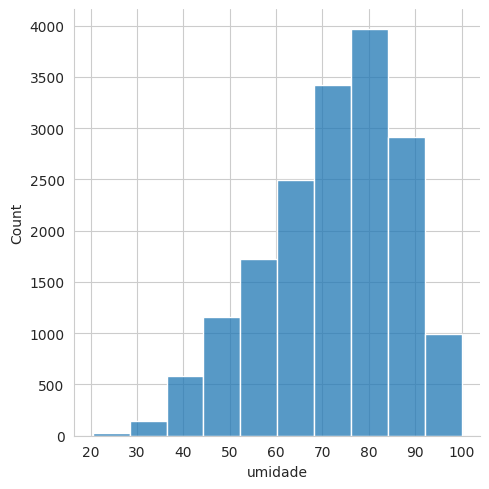

In [91]:
sns.displot(df_limpo, x='umidade', bins=10)
plt.show()

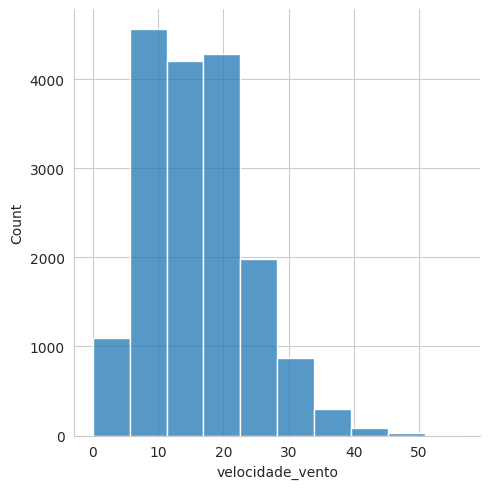

In [92]:
sns.displot(df_limpo, x='velocidade_vento', bins=10)
plt.show()

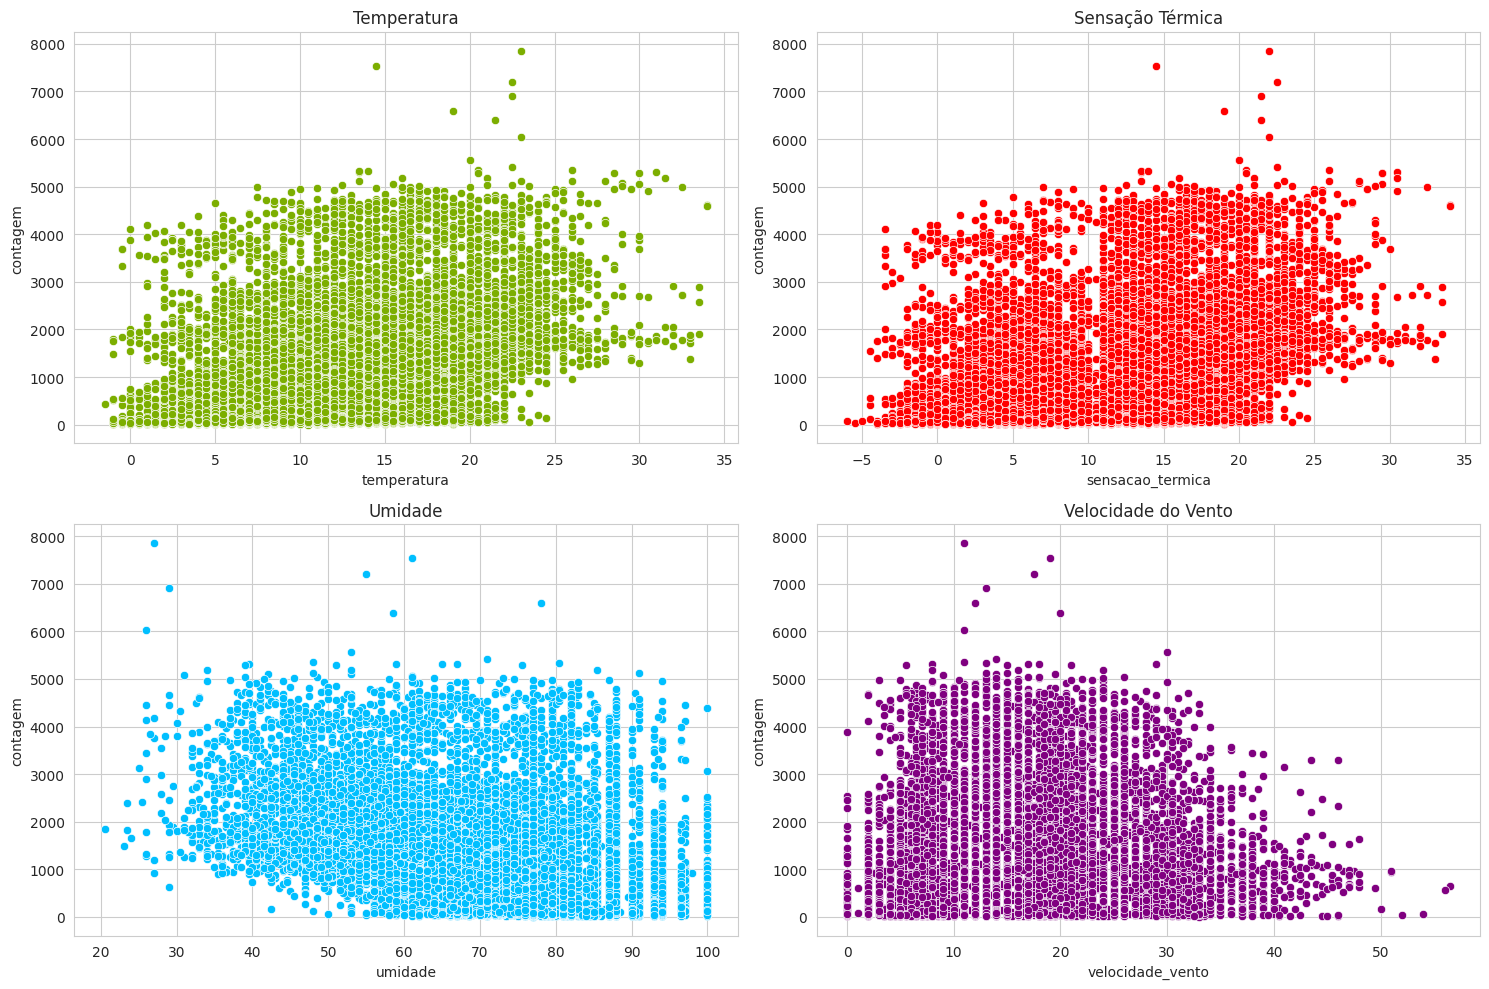

In [93]:
# prompt: crie 4 gráficos do tipo scatterplot das variáveis temperatura, sensacao_termica, umidade, velocidade_vento com a coluna contagem no eixo y. deixar os gráficos na posição 2x2. Cada gráfico deve ter um título
sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(ax=axes[0, 0], x=df_limpo['temperatura'], y=df_limpo['contagem'], color='#7CAE00')
axes[0, 0].set_title('Temperatura')

sns.scatterplot(ax=axes[0, 1], x=df_limpo['sensacao_termica'], y=df_limpo['contagem'], color='#FF0000')
axes[0, 1].set_title('Sensação Térmica')

sns.scatterplot(ax=axes[1, 0], x=df_limpo['umidade'], y=df_limpo['contagem'], color='#00BFFF')
axes[1, 0].set_title('Umidade')

sns.scatterplot(ax=axes[1, 1], x=df_limpo['velocidade_vento'], y=df_limpo['contagem'], color='#800080')
axes[1, 1].set_title('Velocidade do Vento')

plt.tight_layout()
plt.show()


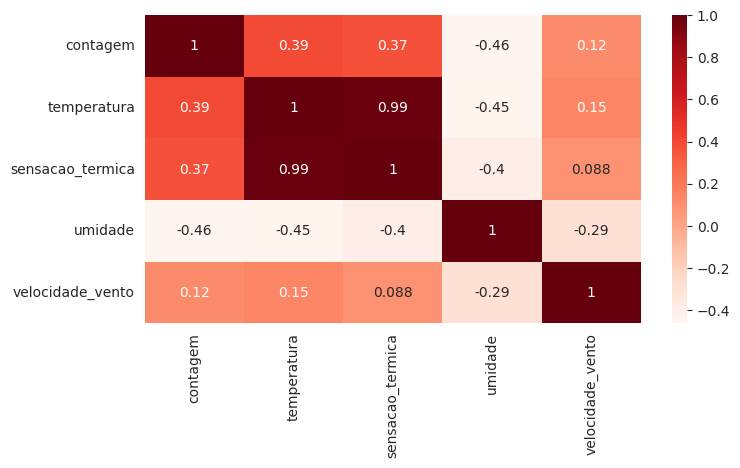

In [94]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Reds')
plt.show()

In [95]:
#variáveis categóricas
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [96]:
#verificando quais os valores únicos
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Conluna: {col}')
  print(df_limpo[col].unique())
  print('-' * 15, '\n')

Conluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']
--------------- 

Conluna: feriado
['Não' 'Sim']
--------------- 

Conluna: fim_de_semana
['Sim' 'Não']
--------------- 

Conluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']
--------------- 



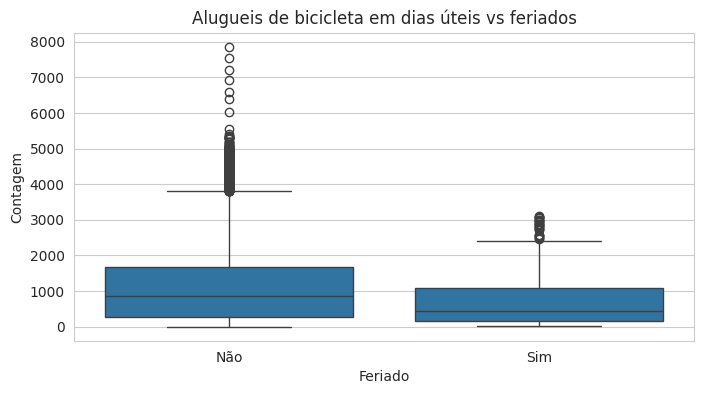

In [97]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Alugueis de bicicleta em dias úteis vs feriados')
plt.xlabel('Feriado')
plt.ylabel('Contagem')
plt.show()

Podemos analisar que em dias úteis há mais demanda.

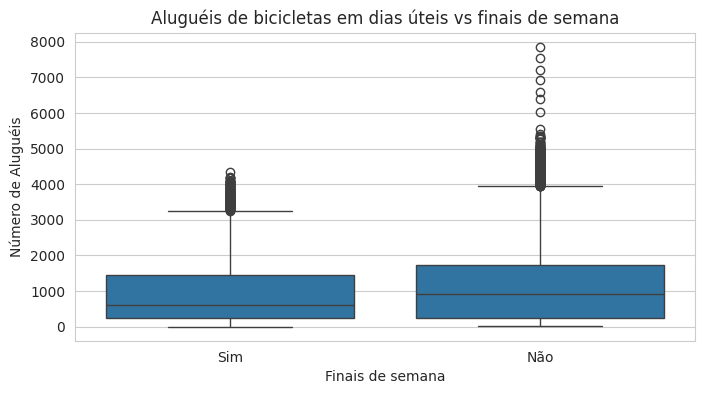

In [98]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='fim_de_semana', y='contagem', data=df_limpo)
plt.title('Aluguéis de bicicletas em dias úteis vs finais de semana')
plt.xlabel('Finais de semana')
plt.ylabel('Número de Aluguéis')
plt.show()

Observamos que nos dias úteis há mais demanda.

In [99]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [100]:
mediana_feriado

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64

In [101]:
mediana_fim_de_semana

fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64

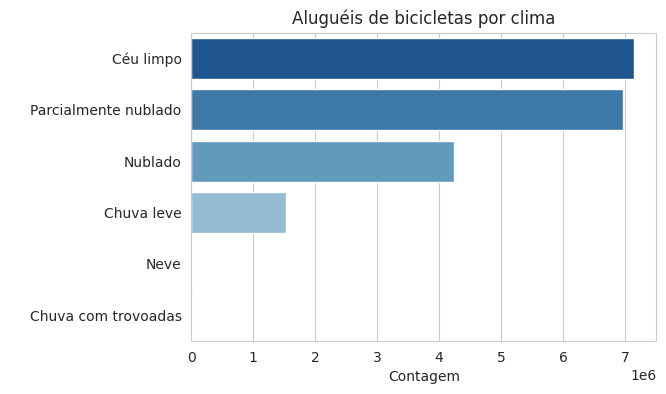

In [102]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='contagem', y='clima', data=df_clima, hue='clima', palette = 'Blues_r', orient='h')
plt.title('Aluguéis de bicicletas por clima')
plt.xlabel('Contagem')
plt.ylabel(' ')
plt.show()

In [103]:
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


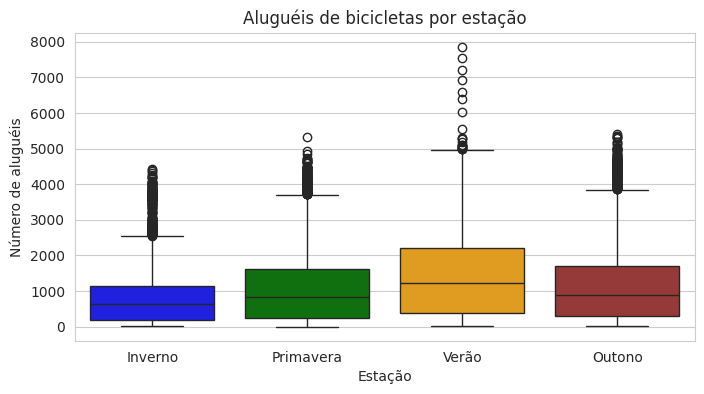

In [104]:
plt.figure(figsize=(8, 4))

paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação')
plt.xlabel('Estação')
plt.ylabel('Número de aluguéis')
plt.show()

In [105]:
df_limpo.groupby('estacao')['contagem'].median()

estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

In [106]:
#Estastiticamente a distribuição entre Primavera e Outono são diferentes?
#Utilizaremos o teste não paramétrico que é utilizado em amostras que são independentes:
#Iniciaremos pela hipótese H0 (hipótese nula) que diz que as distribuições são iguais e a nossa hipótese alternativa H1 é que elas são diferentes.
#Para fazemos esse comparativo vamso usar o teste de 'mannwhitneyu':
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']
#valor de p indica se algo tem realmente a significância estatística que estamos buscando

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative = 'two-sided') #two-sided usado pq no nosso H1 teremos uma diferença.
u_statistic, p_value #valor de u e valor de p

(9044682.5, 0.0004762100221646296)

Neste resultado, vimos que o nosso p valor está bem baixo, ou seja, menor que 0,05. Descartando a nossoa hipótese nula H0. Ou seja, neste caso as distribuições são diferentes. Então orientamos à empresa sobre fazer planos de ações para estas duas estações do ano.

In [107]:
#Convertendo data_hora object para datetime para podermos trabalhar com esta variável do tempo:
df_data = df_limpo.copy()
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [108]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 2.0+ MB


In [109]:
#Agora vamos criar novas colunas relacionadas ao tempo:
#Mês:
df_data['mes'] = df_data['data_hora'].dt.month

#Horário:
df_data['horario'] = df_data['data_hora'].dt.hour


In [110]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [111]:
df_data ['data_hora'] = df_data['data_hora'].dt.date
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [112]:
df_data = df_data.rename(columns={'data_hora': 'data'})
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [113]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


Observamos que precisamos converter novamente de object para datetime

In [114]:
df_data ['data'] = pd.to_datetime(df_data['data'])

In [115]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 2.1+ MB


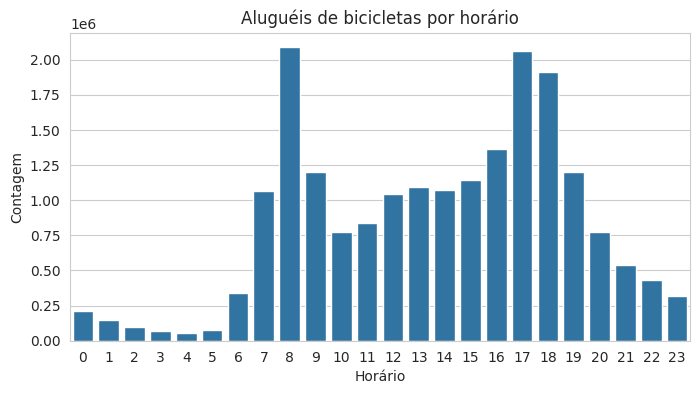

In [116]:
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='horario', y='contagem', data=df_por_hora)
plt.title('Aluguéis de bicicletas por horário')
plt.xlabel('Horário')
plt.ylabel('Contagem')
plt.show()

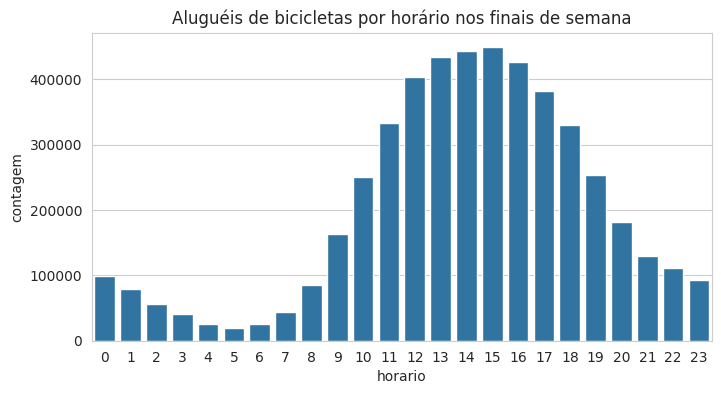

In [117]:
#Dataframe para o final de semana
df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']

alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x= 'horario', y= 'contagem', data= alugueis_fim_de_semana)
plt.title('Aluguéis de bicicletas por horário nos finais de semana')
plt.show()

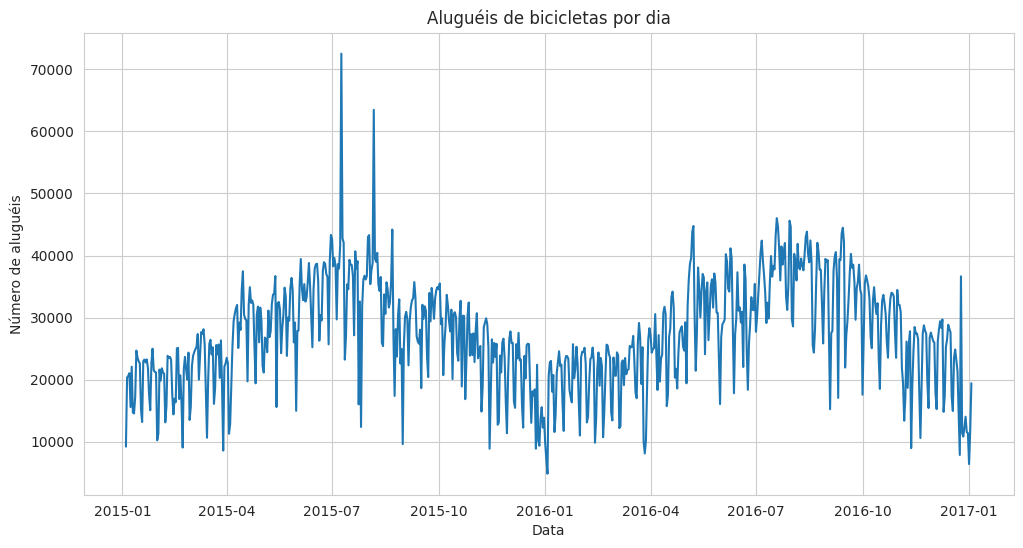

In [118]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_tempo, x='data', y= 'contagem')
plt.title('Aluguéis de bicicletas por dia')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

Sazonalidade = período em que ações vão se repetindo ao longo do tempo.

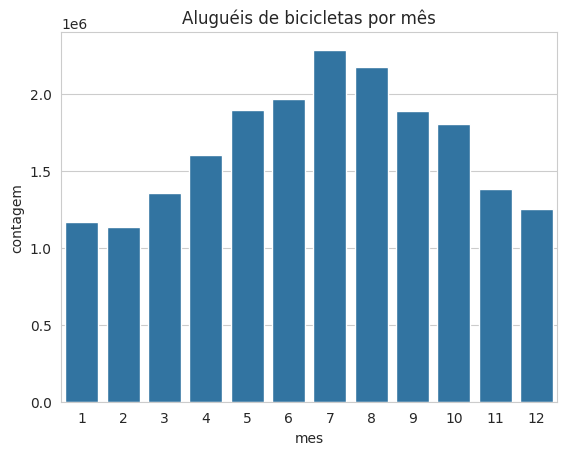

In [119]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

sns.barplot(x='mes', y='contagem', data=alugueis_mensais)
plt.title('Aluguéis de bicicletas por mês')
plt.show()

#Prevendo o futuro

In [120]:
from prophet import Prophet

In [121]:
df_prophet = df_data[['data', 'contagem']].rename(columns={'data': 'ds', 'contagem': 'y'})
df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [122]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [123]:
import numpy as np
np.random.seed(4587) #número escolhido aleatoriamente

#criando o modelo
modelo = Prophet()
modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=90, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/1pp47h9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/uw9gb6ln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73520', 'data', 'file=/tmp/tmpfb981mc_/1pp47h9b.json', 'init=/tmp/tmpfb981mc_/uw9gb6ln.json', 'output', 'file=/tmp/tmpfb981mc_/prophet_modelc4bq56wt/prophet_model-20240711135115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


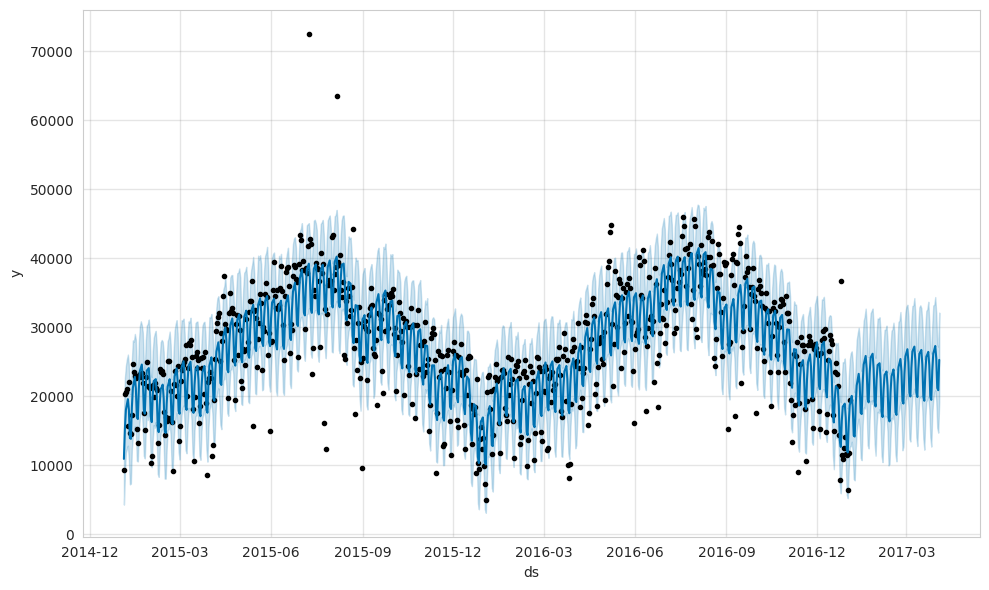

In [124]:
fig1 = modelo.plot(previsao)

In [125]:
#explicando o gráfico acima:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


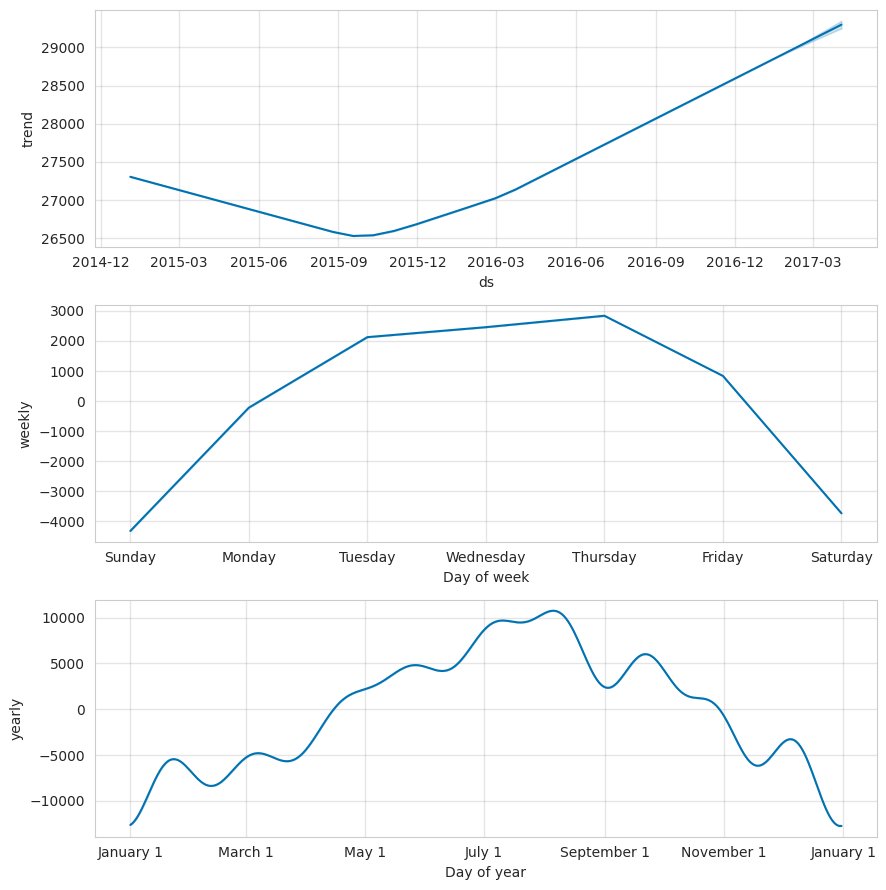

In [126]:
#mostrando os componentes que forma usados para fazer a previsão do modelo:
fig2 = modelo.plot_components(previsao)

# ML treino e teste
Até o momento só fizemos uso dos dados completos para realizar o treinamento do modelo. Agora vamos separar os dados em treino e teste para conseguirmos entender como nosso modelo tá performando de fato apenas com os dados de teste no mundo real.

In [127]:
df_prophet.shape
#saída 730 linhas e 2 colunas

(730, 2)

In [128]:
df_treino = pd.DataFrame()
df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]
#584 é quantidade que reservei para treinar. O recomendado é utilizar entre 70% e 80%

In [129]:
df_teste = pd.DataFrame()
df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [130]:
np.random.seed(4587) #número escolhido aleatoriamente

#criando o modelo
modelo = Prophet()
modelo.fit(df_treino)

futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/8thl35ty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/ec4s50gq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37096', 'data', 'file=/tmp/tmpfb981mc_/8thl35ty.json', 'init=/tmp/tmpfb981mc_/ec4s50gq.json', 'output', 'file=/tmp/tmpfb981mc_/prophet_model4dk474_s/prophet_model-20240711135117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


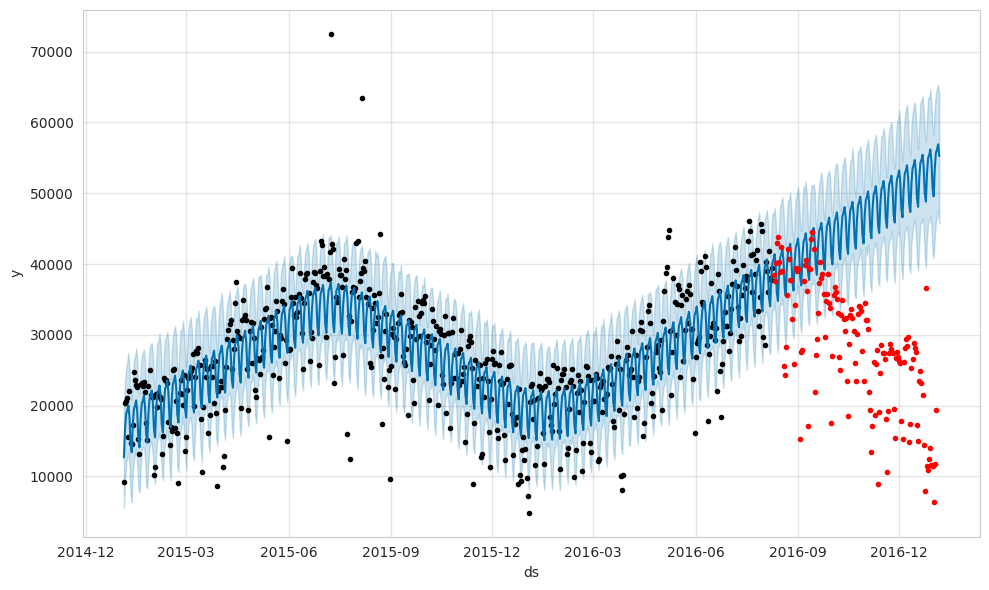

In [131]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Neste gráfico vimos que os dados de teste não estão se encaixando na previsão do modelo. Agora precisamos entender o quanto isso tá ruim entendendo a métrica que nos mostre como este modelo ta performando.

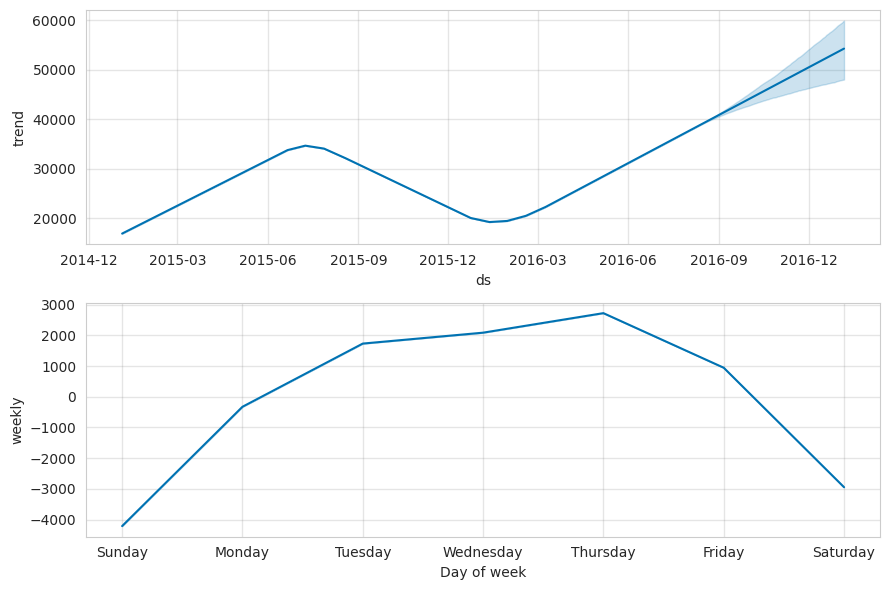

In [132]:
#checando os componentes
fig2 = modelo.plot_components(previsao)

Quando temos uma regressão linear utilizamos a métrica R². Mas neste caso estamos lidando com séries temporais e nem linear. A métrica deste modelo vai comparar os valores que estamos prevendo com os reais e a partir disso tirar alguma média ou estimativa e no final temos um valor que diga: essa previsão tá errando x bicicletas para cima ou para baixo:

In [133]:
#vamos trabalhar apenas com dados de teste

df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_teste, df_previsao, on='ds')
df_comparacao

,ds,y,yhat
0,2016-08-10,38430,40646.666399
1,2016-08-11,37626,41387.553580
2,2016-08-12,40159,39717.735888
3,2016-08-13,43041,35936.820545
4,2016-08-14,43848,34777.785741
...,...,...,...
141,2016-12-30,11566,54505.511686
142,2016-12-31,11424,50724.596343
143,2017-01-01,6421,49565.561539
144,2017-01-02,11823,53551.536790


nesta tabela y é o valor real e yhat o previsto. Conseguimos verificar a diferença discrepante igual ao gráfico. A métrica que iremos usar agora para melhorar estes erros é a que compare o y real com o y previsto (yhat) e tirar uma média no final para ter essa estimativa de quanto o modelo  tá errando:
Será a métrica MSE (erro quadrático médio) e para simplificar elevaremos ao quadrado utilizando o método RMSE:

In [134]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 466132050.6184666
RMSE: 21590.09149166503


Nosso modelo está errando 21590 bicicletas para mais ou para menos. Agora iremos tentar corrigir ao máximo nosso modelo para melhoramento dessas previsões:

In [135]:
#vamos tentar esse melhoramento dando ênfase ao prophet que a sazonalidade é anual
np.random.seed(4587)

modelo = Prophet(yearly_seasonality=True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/ay7k2u53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/32kjk8am.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5572', 'data', 'file=/tmp/tmpfb981mc_/ay7k2u53.json', 'init=/tmp/tmpfb981mc_/32kjk8am.json', 'output', 'file=/tmp/tmpfb981mc_/prophet_modelehuubl29/prophet_model-20240711135120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


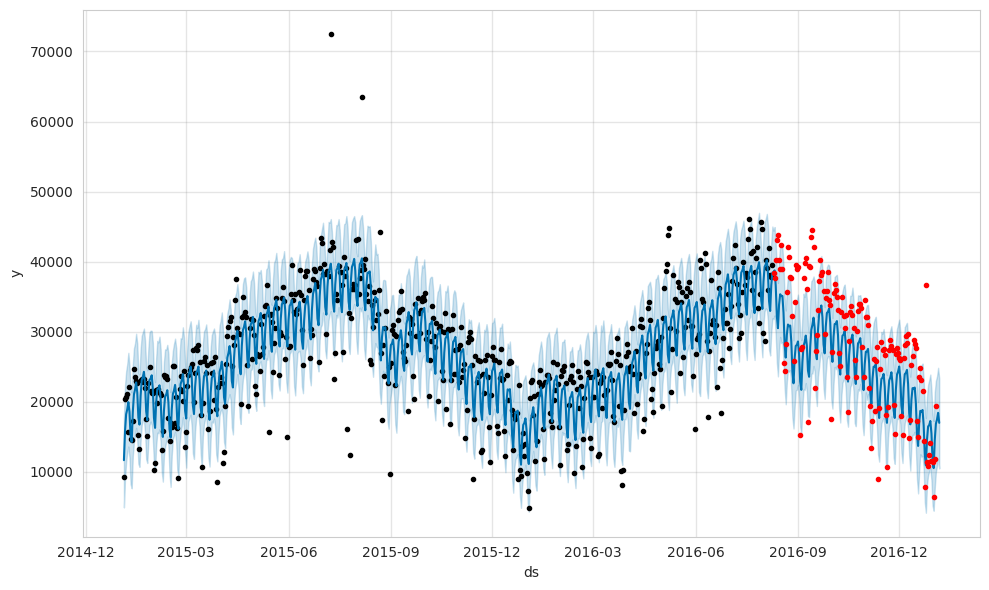

In [136]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Temos agora os dados de teste (pontos vermelhos) bem mais encaixados dentro do intervalo de confiança (azul claro).
Agora vamos verificar os componentes desse gráfico:

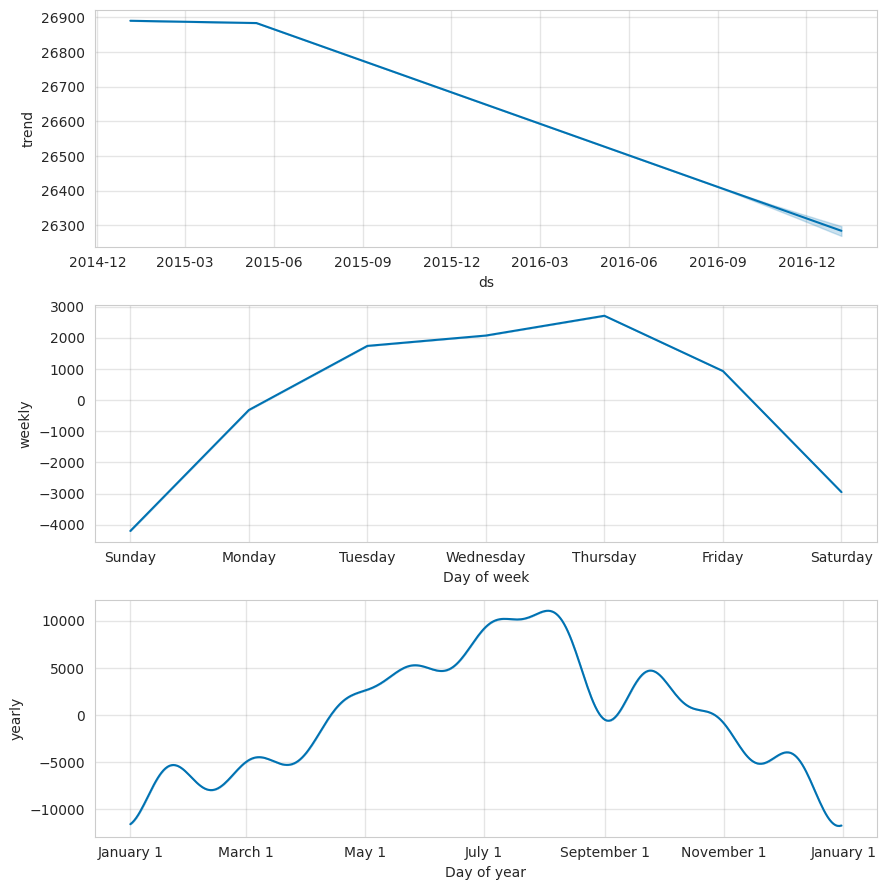

In [137]:
fig2 = modelo.plot_components(previsao)

In [138]:
#verificando novamente o erro
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [139]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 38623883.499975376
RMSE: 6214.8116222437


Observamos o quanto conseguimos melhorar o nosso RMSE caiu para 6214 bicicletas.
Vamos tentar melhorar ainda mais nosso modelo tratando os outliers.

In [140]:
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [141]:
#Para tratar vamos remover os valores que estão fora do intervalo de confiança superior e inferior
#Vamos fazer uma previsão simples criando um novo modelo apenas para obter esses intervalos e posteriormente removê-los
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)

futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/en_r3127.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/_9dk_pe2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25009', 'data', 'file=/tmp/tmpfb981mc_/en_r3127.json', 'init=/tmp/tmpfb981mc_/_9dk_pe2.json', 'output', 'file=/tmp/tmpfb981mc_/prophet_model882tg9sa/prophet_model-20240711135123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [142]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [143]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [144]:
df_treino = pd.DataFrame()
df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [145]:
df_teste = pd.DataFrame()
df_teste['ds'] = sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers['y'][505:]

Agora que temos nossos modelos de treino e teste sem os outliers, vamos treinar o nosso modelo sem os outliers e vamos plotar para vermos como vai ficar a previsão.

In [146]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/pf7r5bgs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/r5p9bx5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96521', 'data', 'file=/tmp/tmpfb981mc_/pf7r5bgs.json', 'init=/tmp/tmpfb981mc_/r5p9bx5n.json', 'output', 'file=/tmp/tmpfb981mc_/prophet_modelas9v3guy/prophet_model-20240711135124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:51:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


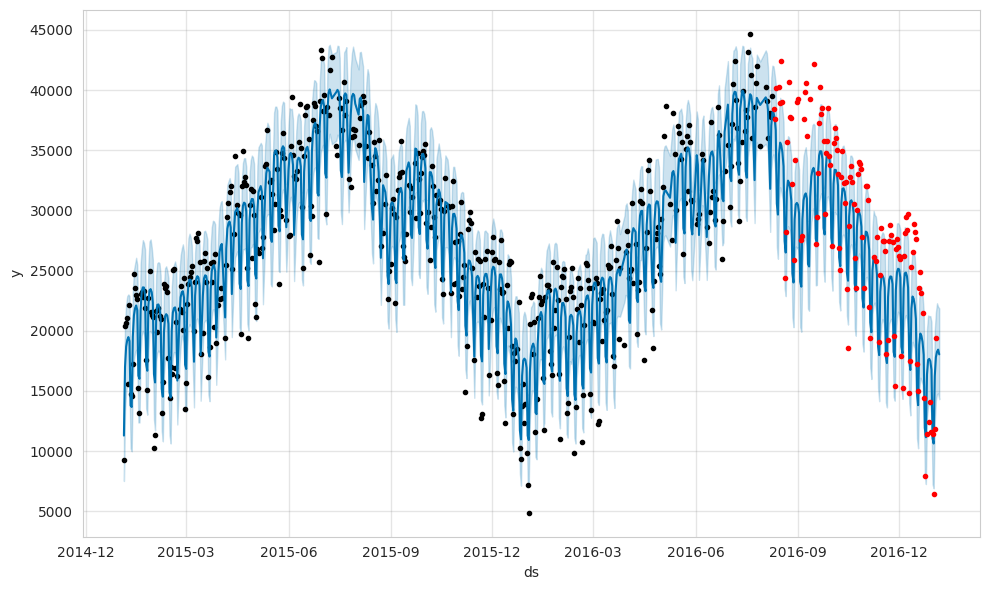

In [147]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [148]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_teste, df_previsao, on='ds')
df_comparacao

,ds,y,yhat
0,2016-08-10,38430,38124.205916
1,2016-08-11,37626,37708.703632
2,2016-08-12,40159,36664.046726
3,2016-08-15,40236,34692.056037
4,2016-08-16,38911,35633.113613
...,...,...,...
121,2016-12-30,11566,16752.064183
122,2016-12-31,11424,11045.380016
123,2017-01-01,6421,10626.497538
124,2017-01-02,11823,16230.512446


In [149]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 15672925.764235971
RMSE: 3958.904616713564


Observamos que o nosso modelo está bem mais acertivo com o RMSE reduzido para 3958. Agora vamos trabalhar este modelo com previsões mais longas:

In [150]:
#código de previsões
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/0cqg49a5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfb981mc_/d1so9lff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79812', 'data', 'file=/tmp/tmpfb981mc_/0cqg49a5.json', 'init=/tmp/tmpfb981mc_/d1so9lff.json', 'output', 'file=/tmp/tmpfb981mc_/prophet_modelo9jaklcp/prophet_model-20240711140019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:00:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:00:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [152]:
#Agora para visualizarmos os resultados desta previsão vamos fazer diferente. Vamos utilizar algo mais interativo:
from prophet.plot import plot_plotly

fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()